In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2
from tabulate import tabulate
%matplotlib inline

# This part: reads and loads data from three different text files into separate DataFrames (human_data, chimp_data, and dog_data), and then displays the first few rows of each DataFrame.

In [2]:
human_data = pd.read_table('human_data.txt')

In [4]:
 human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [5]:
chimp_data = pd.read_table('chimp_data.txt')

In [6]:
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [7]:
dog_data = pd.read_table('dog_data.txt')

In [8]:
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


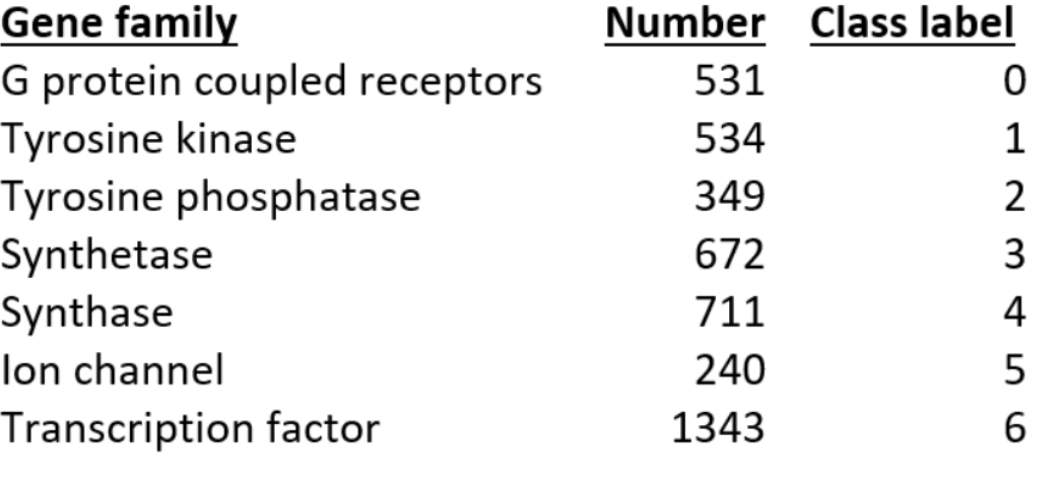

In [9]:
from IPython.display import Image
Image("Capture1.PNG")

# A function called getKmers and applies it to three different DataFrames (human_data, chimp_data, and dog_data) to convert sequence strings into k-mer words

In [10]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [11]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [12]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


# Processes the 'words' column of the 'human_data' DataFrame, converting the k-mer words into space-separated strings. It also extracts the target variable or labels from the DataFrame and assigns them to the 'y_data' variable.

In [13]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
y_data = human_data.iloc[:, 0].values  

In [14]:
print(human_texts[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [15]:
y_data

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

# Processes the 'words' column of the 'chimp_data' and 'dog_data' DataFrames, converting the k-mer words into space-separated strings. It also extracts the target variable or labels from each DataFrame and assigns them to 'y_chimp' and 'y_dog' variables, respectively.

In [16]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
y_chimp = chimp_data.iloc[:, 0].values               # y_c for chimp

dog_texts = list(dog_data['words'])20
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
y_dog = dog_data.iloc[:, 0].values   

In [17]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

# The matrices X, X_chimp, and X_dog, which represent the numerical representations of the texts.

In [18]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


# The x-axis represents the class labels and the y-axis represents the count of each class

<AxesSubplot:>

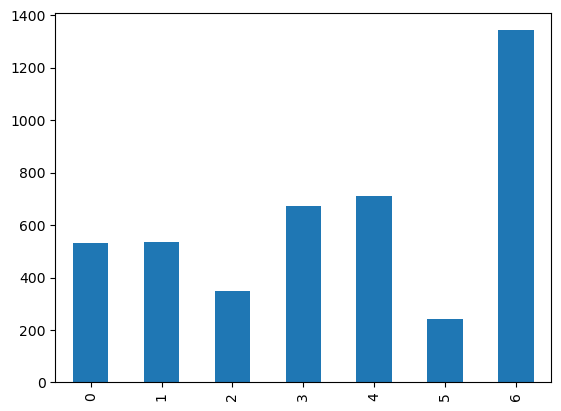

In [19]:
human_data['class'].value_counts().sort_index().plot.bar()

# This code reads sequence data from multiple files, combines them into a single DataFrame, calculates the length of each sequence, and prints the sequence lengths.

In [22]:
import pandas as pd

# Read the human_data.txt, chimp_data.txt, and dog_data.txt files into DataFrames
human_data = pd.read_table('human_data.txt')
chimp_data = pd.read_table('chimp_data.txt')
dog_data = pd.read_table('dog_data.txt')

# Concatenate the 'sequence' columns from all three DataFrames
all_sequences = pd.concat([human_data['sequence'], chimp_data['sequence'], dog_data['sequence']], ignore_index=True)

# Apply the 'len' function on the 'sequence' column
sequence_lengths = all_sequences.apply(len)

# Print the sequence lengths
print(sequence_lengths)


0        207
1        681
2       1686
3       1206
4       1437
        ... 
6877    3633
6878    1563
6879    2469
6880    2670
6881    1509
Name: sequence, Length: 6882, dtype: int64


# K-means  Clustering

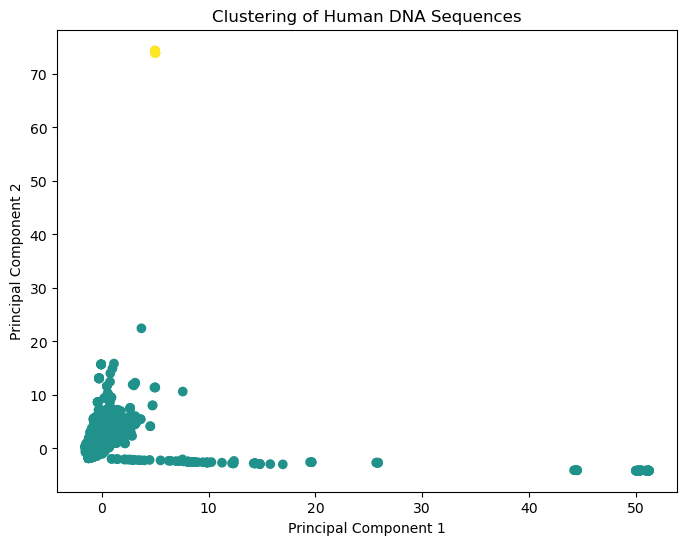

In [59]:
#the code uses CountVectorizer to transform human DNA sequences into numerical representations, 
#performs K-means clustering to group the sequences into clusters, applies PCA to reduce the dimensionality for visualization, 
#and finally plots the clusters in a scatter plot. This helps in analyzing the clustering patterns in the DNA sequences.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ... (previous code omitted for brevity) ...

# Creating the Bag of Words model using CountVectorizer()
cv = CountVectorizer(ngram_range=(4, 4))
X = cv.fit_transform(human_texts)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Apply PCA to reduce the dimensionality of X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Add the cluster labels to the human_data DataFrame
human_data['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering of Human DNA Sequences')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Features Selection

In [42]:
from sklearn.feature_selection import SelectKBest, chi2

# Convert the text data into numerical features
cv = CountVectorizer(ngram_range=(4, 4))
X = cv.fit_transform(human_texts)

# Apply chi-square test for feature selection
k = 100  # Number of features to select
selector = SelectKBest(chi2, k=k)
X_selected = selector.fit_transform(X, y_data)

# Get the selected feature names
feature_names = cv.get_feature_names_out()
selected_feature_names = [feature_names[i] for i in selector.get_support(indices=True)]

# Print the selected feature names
print(selected_feature_names)


['aaggga agggac gggaca ggacat', 'aagtgc agtgcc gtgccg tgccgc', 'aatgcc atgcca tgccaa gccaac', 'acatca catcaa atcaat tcaatg', 'accaga ccagag cagagg agaggc', 'accgga ccggac cggacc ggacca', 'actaca ctacat tacatc acatca', 'actgca ctgcag tgcagt gcagtg', 'actggc ctggcc tggcca ggccag', 'agcagc gcagca cagcag agcagc', 'agggac gggaca ggacat gacatt', 'agggtc gggtcg ggtcgg gtcggt', 'agtact gtactt tacttg acttgc', 'agtgcc gtgccg tgccgc gccgct', 'atcaat tcaatg caatgc aatgcc', 'atccca tcccag cccaga ccagac', 'atcttt tcttta ctttac tttact', 'atgcag tgcagg gcagga caggac', 'atgcca tgccaa gccaac ccaact', 'caagtg aagtgc agtgcc gtgccg', 'cactgc actgca ctgcag tgcagt', 'cagcag agcagc gcagca cagcag', 'cagggt agggtc gggtcg ggtcgg', 'catcaa atcaat tcaatg caatgc', 'catctt atcttt tcttta ctttac', 'catttt attttg ttttga tttgat', 'ccagac cagaca agacag gacagt', 'ccagag cagagg agaggc gaggcc', 'cccgca ccgcag cgcagg gcaggg', 'ccctgt cctgtc ctgtca tgtcat', 'ccgcag cgcagg gcaggg cagggt', 'ccgcta cgctat gctatg ctatgc', 'ccgctg

# Splitting the human dataset into the training set and test set

In [43]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


# Predict the model accuracy ; using naive bayes, random forest, DT, K-neighbors 

In [45]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
rf_y_pred = rf_classifier.predict(X_test)


In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
from sklearn.metrics import accuracy_score, classification_report


In [54]:

# For Naive Bayes Classifier
nb_accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

# For Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

# For Decision Tree Classifier

dt_y_pred = classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)



# For K-Nearest Neighbors Classifier


knn_y_pred = classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)



Naive Bayes Accuracy: 0.9840182648401826
Random Forest Accuracy: 0.9223744292237442


C:\Users\tasni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Decision Tree Accuracy: 0.8242009132420092
K-Nearest Neighbors Accuracy: 0.8242009132420092


C:\Users\tasni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
# For Naive Bayes Classifier
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))

# For Random Forest Classifier
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# For Decision Tree Classifier
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

# For K-Nearest Neighbors Classifier
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       1.00      0.98      0.99       106
           2       1.00      1.00      1.00        78
           3       0.99      0.99      0.99       125
           4       0.99      0.96      0.98       149
           5       1.00      1.00      1.00        51
           6       0.96      0.99      0.98       265

    accuracy                           0.98       876
   macro avg       0.99      0.99      0.99       876
weighted avg       0.98      0.98      0.98       876

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       102
           1       1.00      0.92      0.96       106
           2       1.00      0.90      0.95        78
           3       0.75      0.96      0.84       125
           4       1.00      0.89      0.94       149
      

In [56]:
!pip install tabulate


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline 

# ... existing code ...

# Calculate accuracy, F1 score, recall, and precision
nb_report = classification_report(y_test, y_pred, output_dict=True)
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)
dt_report = classification_report(y_test, dt_y_pred, output_dict=True)
knn_report = classification_report(y_test, knn_y_pred, output_dict=True)

# Create a table
table = [["Model", "Accuracy", "F1 Score", "Recall", "Precision"],
         ["Naive Bayes", nb_report["accuracy"], nb_report["macro avg"]["f1-score"], nb_report["macro avg"]["recall"], nb_report["macro avg"]["precision"]],
         ["Random Forest", rf_report["accuracy"], rf_report["macro avg"]["f1-score"], rf_report["macro avg"]["recall"], rf_report["macro avg"]["precision"]],
         ["Decision Tree", dt_report["accuracy"], dt_report["macro avg"]["f1-score"], dt_report["macro avg"]["recall"], dt_report["macro avg"]["precision"]],
         ["K-Nearest Neighbors", knn_report["accuracy"], knn_report["macro avg"]["f1-score"], knn_report["macro avg"]["recall"], knn_report["macro avg"]["precision"]]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))

+---------------------+------------+------------+----------+-------------+
| Model               |   Accuracy |   F1 Score |   Recall |   Precision |
+=====================+============+============+==========+=============+
| Naive Bayes         |   0.984018 |   0.987379 | 0.985129 |    0.989803 |
+---------------------+------------+------------+----------+-------------+
| Random Forest       |   0.922374 |   0.921917 | 0.909183 |    0.943312 |
+---------------------+------------+------------+----------+-------------+
| Decision Tree       |   0.824201 |   0.832735 | 0.781768 |    0.9226   |
+---------------------+------------+------------+----------+-------------+
| K-Nearest Neighbors |   0.824201 |   0.832735 | 0.781768 |    0.9226   |
+---------------------+------------+------------+----------+-------------+


# Using Confusion-matrix

In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
